In [0]:
# https://github.com/adsieg/text_similarity

In [0]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from bs4 import BeautifulSoup as bs
import numpy as np


In [0]:
data = pd.read_csv("complete_data.csv")

In [0]:
data

,ISBN,reviews,description,pages,popular_shelves,format,rating_5,rating_4,rating_3,rating_2,rating_1,rating_total_count,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL,description_vector
0,0195153448,1.0,"Featuring the authors' extensive, clear, and f...",844.0,fantasy fiction,Paperback,465,425,248,31,11,1180,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,[ -36.9425597 80.509411 33.439935 3...
1,0425176428,128.0,Historians and inquisitive laymen alike love t...,395.0,fiction biography,Paperback,437,892,751,164,37,2281,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,[ 2.125693 11.9565563 12.192848 -1.56...
2,0671870432,0.0,"A former cop, now an attorney, falls into dang...",0.0,fiction,Audio Cassette,1702,2406,1980,456,164,6708,PLEADING GUILTY,Scott Turow,1993,Audioworks,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,[ 2.8186350e+00 9.3432200e-01 4.2583800e+00 ...
3,0679425608,4.0,"For this rousing, revisionist history, the for...",317.0,fiction biography,Hardcover,1463,2859,2392,549,105,7368,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...,[ -2.7570391 10.504358 8.185092 -3.58...
4,0771074670,3.0,David Adams Richards’ Governor General’s Award...,232.0,fiction,Paperback,114,210,171,28,13,536,Nights Below Station Street,David Adams Richards,1988,Emblem Editions,http://images.amazon.com/images/P/0771074670.0...,http://images.amazon.com/images/P/0771074670.0...,http://images.amazon.com/images/P/0771074670.0...,[-7.32653000e-01 1.32759622e+01 1.77010740e+...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18568,0553268783,3.0,"""When John Cameron Butler was a child, he was ...",117.0,fiction,Paperback,738,1261,1390,582,289,4260,Light in the Forest,Coward Richter,1990,Starfire,http://images.amazon.com/images/P/0553268783.0...,http://images.amazon.com/images/P/0553268783.0...,http://images.amazon.com/images/P/0553268783.0...,[ 2.39450750e+00 8.01149070e+00 2.16788418e+...
18569,0449200531,5.0,Young physicist Jonathan Derry is given some m...,310.0,fiction,Mass Market Paperback,866,1396,953,120,22,3357,Twice Shy,Dick Francis,1983,Fawcett Books,http://images.amazon.com/images/P/0449200531.0...,http://images.amazon.com/images/P/0449200531.0...,http://images.amazon.com/images/P/0449200531.0...,[ -0.270086 3.178283 9.93671444 -11.35...
18570,0688094066,2.0,"INVENTING THE MIDDLE AGES: The Lives, Works, a...",477.0,biography,Hardcover,112,146,99,37,14,408,Inventing the Middle Ages,Norman F Cantor,1991,"Morrow, William Company In",http://images.amazon.com/images/P/0688094066.0...,http://images.amazon.com/images/P/0688094066.0...,http://images.amazon.com/images/P/0688094066.0...,[ 2.61585000e-01 3.88441390e+01 1.65979098e+...
18571,0440539811,736.0,"It was a deadly mistake. Joseph Malik, editor ...",805.0,fiction fantasy,Paperback,5977,4222,2568,939,473,14179,The Illuminatus Trilogy: The Eye in the Pyrami...,Robert Shea,1984,Dell Publishing Company,http://images.amazon.com/images/P/0440539811.0...,http://images.amazon.com/images/P/0440539811.0...,http://images.amazon.com/images/P/0440539811.0...,[ 4.5705684 5.93467443 16.598108 -17.15...


## Count Vectorizer


In [0]:
s1 = "The Secretary greets President in Washington"
s2 = "Obama is our President"

def cosine_distance_countvectorizer_method(s1, s2):
    
    # sentences to list
    allsentences = [s1 , s2]
    
    # packages
    from sklearn.feature_extraction.text import CountVectorizer
    from scipy.spatial import distance
    
    # text to vector
    vectorizer = CountVectorizer()
    all_sentences_to_vector = vectorizer.fit_transform(allsentences)
    # print(all_sentences_to_vector)
    text_to_vector_v1 = all_sentences_to_vector.toarray()[0].tolist()
    print(text_to_vector_v1)
    text_to_vector_v2 = all_sentences_to_vector.toarray()[1].tolist()
    print(text_to_vector_v2)
    
    # distance of similarity
    cosine = distance.cosine(text_to_vector_v1, text_to_vector_v2)
    print('Similarity of two sentences are equal to ',round((1-cosine)*100,2),'%')
    print("Cosine value is : ",cosine)

cosine_distance_countvectorizer_method(s1,s2)

[1, 1, 0, 0, 0, 1, 1, 1, 1]
[0, 0, 1, 1, 1, 1, 0, 0, 0]
Similarity of two sentences are equal to  20.41 %
Cosine value is :  0.7958758547680684


## Generate Vectors

In [0]:
import os
if not os.path.exists("glove.6B.zip"):
  !wget http://nlp.stanford.edu/data/glove.6B.zip
  !unzip glove.6B.zip

--2020-02-23 16:03:16--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-02-23 16:03:21--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-02-23 16:03:22--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [0]:
glove = open("glove.6B.50d.txt","r").read().split("\n")

In [0]:
from collections import defaultdict
from tqdm import tqdm
glove_dict = defaultdict(list)
for i in tqdm(glove[:-1]):
  temp = i.split(" ")
  glove_dict[temp[0]] = [float(j) for j in temp[1:]]

100%|██████████| 400000/400000 [00:07<00:00, 56166.35it/s]


In [0]:
import nltk
import re
from nltk.tokenize import word_tokenize , sent_tokenize
from nltk.corpus import stopwords
nltk.download("punkt")
nltk.download("stopwords")
Stopwords = stopwords.words("english")

def get_vector(x):
  words = word_tokenize(str(x))
  words = [i.lower() for i in words if i not in Stopwords and i.isalpha()]
  vector = np.zeros(50)
  for i in words:
    if i in glove_dict:
      vector = vector + np.array(glove_dict[i])
  return vector

embeddings = data.description.apply(lambda x: get_vector(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
import pickle

with open("embeddings.pickle","wb") as file:
  pickle.dump(embeddings,file)

#### Working with vectors work_1

In [0]:
# ss1 = 'The president greets the press in Chicago'
# ss2 = 'Obama speaks to the media in Illinois'
ss1= data.description.iloc[1]
ss2= data.description.iloc[5]

In [0]:
ss1_vector = get_vector(ss1)
ss2_vector = get_vector(ss2)

In [0]:
from scipy.spatial import distance

In [0]:
print("Cosine between ss1 and ss2 : ",distance.cosine(ss1_vector,ss2_vector))
print("Eucledian Distance between ss1 and ss2 : ",distance.euclidean(ss1_vector,ss2_vector))
print("Minkowski between ss1 and ss2 : ",distance.minkowski(ss1_vector,ss2_vector))
print("Jaccard Distance between ss1 and ss2 is :",distance.jaccard(ss2_vector,ss1_vector))

Cosine between ss1 and ss2 :  0.05166675494141426
Eucledian Distance between ss1 and ss2 :  152.82029193507117
Minkowski between ss1 and ss2 :  152.82029193507117
Jaccard Distance between ss1 and ss2 is : 1.0


#### Work_2

In [0]:
from gensim.test.utils import get_tmpfile,datapath
from gensim.scripts.glove2word2vec import glove2word2vec

In [0]:
input_file = datapath("/content/glove.6B.100d.txt")
output_file = get_tmpfile("/content/model_testing_embeddings.kv")
glove2word2vec(input_file,output_file)

(400000, 100)

In [0]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format("/content/model_testing_embeddings.kv")

In [0]:
model.most_similar(positive="name")

[('names', 0.805137038230896),
 ('known', 0.7899130582809448),
 ('word', 0.7795394659042358),
 ('named', 0.7567732930183411),
 ('referred', 0.7518554925918579),
 ('refer', 0.7310047745704651),
 ('nickname', 0.7171461582183838),
 ('same', 0.7171194553375244),
 ('meaning', 0.7128324508666992),
 ('as', 0.7021154165267944)]

In [0]:
keys = ['dance','technology','greeting', 'early', 'costly', 'exit', 'artificial']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [0]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=4000, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

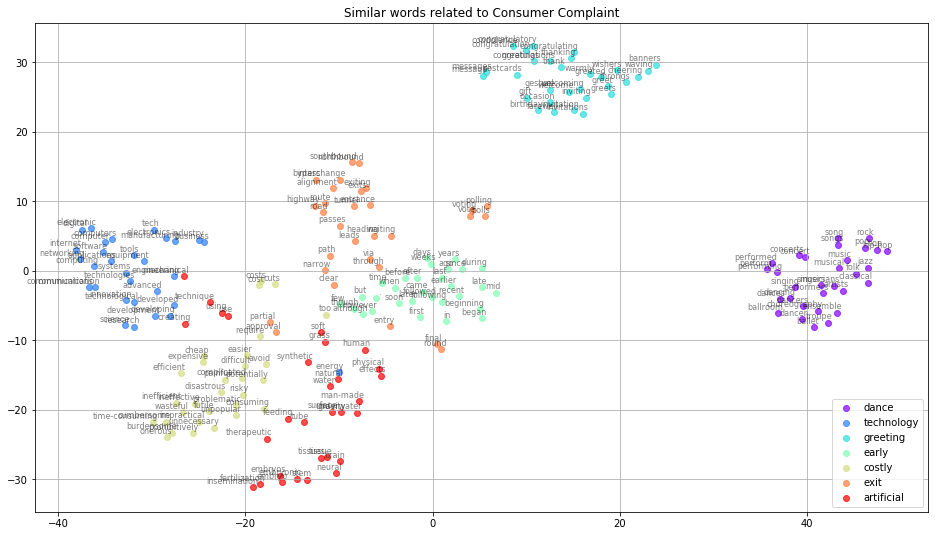

In [0]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline
import warnings
warnings.filterwarnings('ignore')

def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    # if filename:
    #     plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words related to Consumer Complaint', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

## Document embeddings using word embeddings

In [0]:
from tqdm import tqdm
embeddings = []
isbn = []
for i,row in tqdm(data.iterrows()):
  isbn.append([row.ISBN])
  # ,row.format,row.rating_5])
  embeddings.append(get_vector(str(row.description)))

18573it [00:39, 465.32it/s]


In [0]:
j = pd.DataFrame(embeddings[:18573],index=None,columns=None)
# # m = pd.DataFrame(isbn)
# # j = pd.concat([m,j],axis=1)
j.to_csv("embeddings.tsv",sep="\t")
pd.DataFrame(isbn[:18573],index=None).to_csv("data.tsv",sep="\t")

# Another Try

In [0]:
from tqdm import tqdm
embeddings_train = []
for i in tqdm(data.description):
  embeddings_train.append(get_vector(str(i)))

100%|██████████| 18573/18573 [00:25<00:00, 725.62it/s]


In [0]:
from scipy.spatial.distance import cosine
import tensorflow as tf
def cosine_distance_simple(x,y):
  return cosine(x,y)

from keras import backend as K

def cosine_distance(vests):
    x, y = vests
    x = K.l2_normalize(x, axis=-1)
    y = K.l2_normalize(y, axis=-1)
    return -K.mean(x * y, axis=-1, keepdims=True)

def cos_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0],1)

# distance = Lambda(cosine_distance, output_shape=cos_dist_output_shape)([processed_a, processed_b]

Using TensorFlow backend.


In [0]:
train_1,train_2,y_train = [],[],[]
for i in tqdm(data.description[:10]):
  vec_1 = get_vector(i)
  for j in data.description:
    vec_2 = get_vector(j)
    train_1.append(vec_1)
    train_2.append(vec_2)
    y_train.append(cosine_distance_simple(vec_1,vec_2))

100%|██████████| 10/10 [04:21<00:00, 26.17s/it]


In [0]:
from keras.layers import BatchNormalization , Input , Dense , Dropout , LSTM ,Bidirectional ,Embedding ,Conv1D,Conv2D ,Lambda, Concatenate ,Activation
from keras.models import Model,Sequential

In [0]:
input_1 = Input(shape=(50,))
output_1 = Embedding(input_dim=50,output_dim=100,input_length = 50,activity_regularizer="l2",trainable=True)(input_1)
output_1 = Bidirectional(LSTM(50,return_sequences=True))(output_1)
output_1 = LSTM(200)(output_1)
output_1 = Dense(128,activation="tanh")(output_1)

input_2 = Input(shape=(50,))
output_2 = Embedding(input_dim=50,output_dim=100,input_length = 50,trainable=True)(input_2)
output_2 = Bidirectional(LSTM(50,return_sequences=True))(output_2)
output_2 = LSTM(200)(output_2)
output_2 = Dense(128,activation="tanh")(output_2)

out = Concatenate(name="merge")([output_1,output_2])
# out = Lambda(cosine_distance, cos_dist_output_shape)([output_1, output_2])
out = Dense(1)(out)
out = Activation("relu",name="out")(out)

In [0]:
model = Model([input_1,input_2],[out])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 50)           0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 50)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 50, 100)      5000        input_1[0][0]                    
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 50, 100)      5000        input_2[0][0]                    
____________________________________________________________________________________________

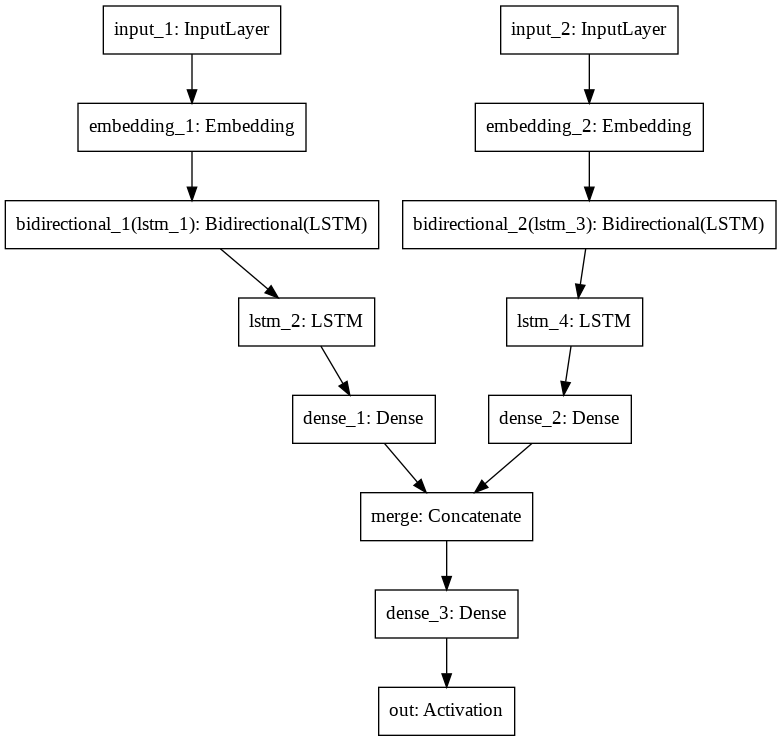

In [0]:
from keras.utils import plot_model
plot_model(model)

In [0]:
import keras.backend as K
def mean_rectified_infinity_loss(y_true, y_pred):
    k = 5.0

    cond = K.equal(y_true, K.zeros_like(y_true))
    if K.backend() == 'tensorflow':
        import tensorflow as tf
        # err = tf.where(cond, K.square(y_pred - y_true), K.exp(-y_pred / k))
        err = tf.where(cond, K.square(y_pred),
                       k/K.square(K.clip(y_pred, min_value=K.epsilon(), max_value=float('inf'))))
    else:
        from theano.ifelse import ifelse
        # err = ifelse(cond, K.square(y_pred - y_true), K.exp(-y_pred / k))
        err = ifelse(cond, K.square(y_pred),
                     k/K.square(K.clip(y_pred, min_value=K.epsilon(), max_value=float('inf'))))

    return K.mean(err, axis=-1)

def exponent_neg_manhattan_distance(left, right):
  return K.exp(-K.sum(K.abs(left-right), axis=1, keepdims=True))
def exponent_neg_manhattan_distance2(left, right):
  return K.exp(-K.sum(K.abs(left-right), axis=1, keepdims=True))

In [0]:
# left,right = get_vector(data.description[1]),get_vector(data.description[2])

In [0]:
model.compile(optimizer="rmsprop",loss="mean_squared_error")

In [0]:
model.fit([train_1[:10000],train_2[:10000]],y_train[:10000],batch_size=32,epochs=5,verbose=1,validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/5
8000/8000 [==============================] - 147s 18ms/step - loss: nan - val_loss: nan
Epoch 2/5
8000/8000 [==============================] - 141s 18ms/step - loss: nan - val_loss: nan
Epoch 3/5
8000/8000 [==============================] - 142s 18ms/step - loss: nan - val_loss: nan
Epoch 4/5
8000/8000 [==============================] - 142s 18ms/step - loss: nan - val_loss: nan
Epoch 5/5
8000/8000 [==============================] - 142s 18ms/step - loss: nan - val_loss: nan


In [0]:
np.array(y_train).shape

(185730,)

# TensorFLow Hub **Try**


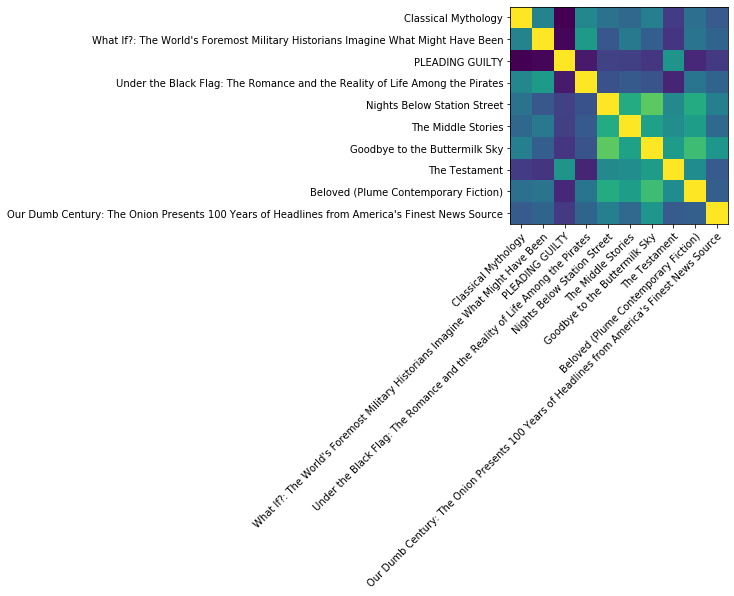

In [0]:
import matplotlib.pyplot as plt

def heatmap(x_labels, y_labels, values):
  fig, ax = plt.subplots()
  im = ax.imshow(values)

  # # We want to show all ticks...
  ax.set_xticks(np.arange(len(x_labels)))
  ax.set_yticks(np.arange(len(y_labels)))
  # # ... and label them with the respective list entries
  ax.set_xticklabels(x_labels)
  ax.set_yticklabels(y_labels)

  # Rotate the tick labels and set their alignment.
  plt.setp(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10,
        rotation_mode="anchor")

  # # Loop over data dimensions and create text annotations.
  # for i in range(len(y_labels)):
  #     for j in range(len(x_labels)):
  #         text = ax.text(j, i, "%.2f"%values[i, j],
  #                         ha="center", va="center", color="w", fontsize=6)

  fig.tight_layout()
  plt.show()

heatmap(names, names, corr)

In [0]:
import tensorflow as tf
import tensorflow_hub as hub

module_url = "https://tfhub.dev/google/universal-sentence-encoder/1?tf-hub-format=compressed"

# Import the Universal Sentence Encoder's TF Hub module
embed = hub.Module(module_url)

# sample text
names = data.bookTitle
messages = data.description

similarity_input_placeholder = tf.placeholder(tf.string, shape=(None))
similarity_message_encodings = embed(similarity_input_placeholder)
with tf.Session() as session:
  session.run(tf.global_variables_initializer())
  session.run(tf.tables_initializer())
  message_embeddings_ = session.run(similarity_message_encodings, feed_dict={similarity_input_placeholder: messages})

  corr = np.inner(message_embeddings_, message_embeddings_)
  # print(corr)
  # heatmap(names, names, corr)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [0]:
# pd.DataFrame(message_embeddings_).to_csv("books_content_embeddings.tsv",sep="\t",index=None)
pd.DataFrame(names).to_csv("book_names.tsv",sep="\t",index=None)

# Try with google embeddings

In [0]:
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2020-02-23 07:32:32--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.97.77
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.97.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  36.6MB/s    in 44s     

2020-02-23 07:33:16 (35.7 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [0]:
!gunzip -k GoogleNews-vectors-negative300.bin.gz

In [0]:
from gensim.models import Word2Vec,KeyedVectors

In [0]:
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [0]:
import pandas as pd
import numpy as np


In [0]:
data = pd.read_csv("complete_data.csv")

In [0]:
import nltk
import re
from nltk.tokenize import word_tokenize , sent_tokenize
from nltk.corpus import stopwords
nltk.download("punkt")
nltk.download("stopwords")
Stopwords = stopwords.words("english")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
def get_vector_google(model,x):
  words = word_tokenize(str(x))
  words = [i.lower() for i in words if i not in Stopwords and i.isalpha()]
  vector = np.zeros(300)
  for i in words:
    if i in model.wv.vocab:
      vector = vector + np.array(model[i])
  return vector

from tqdm import tqdm
embeddings = []
for i in tqdm(data.description):
  embeddings.append(get_vector_google(model,i))
  

100%|██████████| 18573/18573 [00:37<00:00, 501.17it/s]


In [0]:
from keras.preprocessing.text import Tokenizer, one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Input, LSTM, RepeatVector, Dense, Dropout
from keras.models import Model

Using TensorFlow backend.


In [0]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(data.description)

In [0]:
sequences = tokenizer.texts_to_sequences(data.description)

In [0]:
x_train = pad_sequences(sequences)

In [0]:
y_train = tokenizer.texts_to_matrix(data.description,mode = "binary")

In [0]:
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, 300))
for word, i in tokenizer.word_index.items():
    if word in model:
        embedding_matrix[i] = model[word]
    else:
        embedding_matrix[i] = np.random.rand(1, 300)[0]

In [0]:
embedding_layer = Embedding(len(tokenizer.word_index) + 1,
                            300,
                            weights=[embedding_matrix],
                            trainable=False)

inputs = Input(shape=(len(x_train[0]), ), dtype='int32')
embedded_sequences = embedding_layer(inputs)
encoded = LSTM(100)(embedded_sequences)

decoded = RepeatVector(len(x_train[0]), )(encoded)
decoded = LSTM(50)(decoded)


In [0]:
#decoded = Dropout(0.5)(decoded)
decoded = Dense(y_train.shape[1], activation='softmax')(decoded)

sequence_autoencoder = Model(inputs, decoded)

encoder = Model(inputs, encoded)

In [0]:
sequence_autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1291)              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 1291, 300)         30676500  
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 1291, 100)         0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense_1 (Dense)              (None, 102255)            5215005   
Total params: 36,082,105
Trainable params: 5,405,605
Non-trainable params: 30,676,500
_______________________________________

In [0]:
encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1291)              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 1291, 300)         30676500  
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
Total params: 30,836,900
Trainable params: 160,400
Non-trainable params: 30,676,500
_________________________________________________________________


In [0]:
sequence_autoencoder.compile(optimizer='rmsprop', loss='categorical_crossentropy')

sequence_autoencoder.fit(x_train, y_train,
                          nb_epoch=10,
                          batch_size=256,
                          shuffle=True)
                          #metrics=['acc'])
                          #validation_data=(x_train, y_train))

Epoch 1/10
18573/18573 [==============================] - 336s 18ms/step - loss: 793.8705
Epoch 2/10
18573/18573 [==============================] - 337s 18ms/step - loss: 758.8296
Epoch 3/10
18573/18573 [==============================] - 338s 18ms/step - loss: 755.6072
Epoch 4/10
18573/18573 [==============================] - 333s 18ms/step - loss: 752.1172
Epoch 5/10
18573/18573 [==============================] - 335s 18ms/step - loss: 749.7942
Epoch 6/10
18573/18573 [==============================] - 338s 18ms/step - loss: 747.7734
Epoch 7/10
18573/18573 [==============================] - 336s 18ms/step - loss: 746.0942
Epoch 8/10
18573/18573 [==============================] - 334s 18ms/step - loss: 744.3215
Epoch 9/10
18573/18573 [==============================] - 335s 18ms/step - loss: 742.8743
Epoch 10/10
18573/18573 [==============================] - 335s 18ms/step - loss: 741.6840


In [0]:
sequence_autoencoder.save("sequence_autoencoder.hdf5")

In [0]:
sequence_1 = data.description[1]
sequence_2 = data.description[2]
x_1 = pad_sequences(tokenizer.texts_to_sequences(sequence_1),maxlen=len(x_train[0]))
x_2 = pad_sequences(tokenizer.texts_to_sequences(sequence_2),maxlen=len(x_train[0]))

In [0]:
from time import time
start = time()
predicted_1 = np.mean(sequence_autoencoder.predict(x_1),axis=0)
print("time taken" ,time()-start)
start = time()
predicted_2 = np.mean(sequence_autoencoder.predict(x_2),axis=0)
print("time taken" ,time()-start)

time taken 20.481218338012695
time taken 7.951452732086182


In [0]:
from scipy.spatial.distance import cosine,euclidean
print(cosine(x_1[0],x_2[0]))
print(cosine(predicted_1,predicted_2))

0.0
3.3974647521972656e-06


In [0]:
euclidean(x_1[0],x_2[0])

1772.0

In [0]:
sequence_1

'Historians and inquisitive laymen alike love to ponder the dramatic what-its of history. In these twenty never-before-published essays, some of the keenest minds of our time ask the big, tantalizing questions: Where might we be if history had not unfolded the way it did?  Why, how, and when was our fortune made real? The answers are surprising, sometimes frightening, and always entertaining..'

In [0]:
sequence_2

"A former cop, now an attorney, falls into danger when he tries to find a fellow attorney who's absconded with millions from a settlement fund. 4 cassettes."

In [0]:
x_train[1]

array([   0,    0,    0, ...,    2,  249, 1177], dtype=int32)

# Document Similarity using Embeddings